<a href="https://colab.research.google.com/github/Churabros/Moringa_phase2_project/blob/main/Phase_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3 Project
##Group Members


1.   Yusuf Ali
2.   Winny Chepkoech
3.   Festus Muchemi
4.   Krop Leonard



# winny
# overview
In the evolving landscape of the entertainment industry, major companies are increasingly investing in original video content to capture audience attention and secure market share. Following this trend, our company has decided to venture into the movie production business by establishing a new movie studio. However, given our lack of experience in this domain, it is crucial to understand the current dynamics of the box office to make informed decisions about the types of films to produce. This analysis will help our company’s new movie studio to strategically plan and create films that are more likely to perform well at the box office, thereby ensuring a competitive edge in the market.



# Business understanding
The film industry is a highly competitive and dynamic sector, where the success of a movie depends on various factors, including genre, budget, cast, marketing, and release timing. By analyzing these factors, we can gain insights into what makes a movie successful and use this knowledge to guide our production choices. Understanding the preferences and behaviors of moviegoers, as well as the strategies employed by successful films, will be critical in shaping our studio's content creation strategy.



#Objectives  
1.	Identify leading movie studios by analyzing performance metrics to determine which consistently produce high-performing films.
2.	Compare production costs to revenue to identify optimal investment strategies for maximizing return on investment.
3.	Analyze movie ratings and audience preferences to understand what elements contribute to higher viewer satisfaction.
4.	Benchmark against competitors by investigating their successful strategies and practices in the movie production industry.


#Data Understanding
The Data that was used for this analysis will be pulled from Three Diffrent sources

`tn.movie_budgets.csv`

* **Source**: Blank
* **Contents**: Blank
* **Format**: Blank

`tmdb.movies.csv`

* **Source**: Blank
* **Contents**: Blank
* **Format**: Blank

`rt.movie_info.tsv`

* **Source**: Blank
* **Contents**: Blank
* **Format**: Blank



**Inserting Relevant Libraries to help in analysing the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import sqlite3

**Import Relevant Libraries That will be used in the analysis**

In [2]:
#Imported Datasets
df_budget = pd.read_csv('/content/tn.movie_budgets.csv.gz')
df_tmdf = pd.read_csv('/content/tmdb.movies.csv.gz')
df_gross = pd.read_csv('/content/bom.movie_gross.csv.gz')
df_rev = pd.read_csv('/content/rt.reviews.tsv.gz', sep='\t', encoding='latin1') # Try using 'latin1' encoding
df_info = pd.read_csv('/content/rt.movie_info.tsv.gz', sep='\t')
path = '/content/im.db'
conn = sqlite3.connect(path)

#Data Exploration

In [3]:
df_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
# Yusuf Ali
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
# Yusuf Ali
df_tmdf.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
df_tmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [8]:
# Yusuf Ali
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
# Yusuf Ali
df_imdb = pd.read_sql(
    """
    SELECT *
    FROM sqlite_master
    """
, conn
)

df_imdb

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,movie_akas,movie_akas,3,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
2,table,movie_ratings,movie_ratings,4,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [10]:
#Yusuf Ali
query = """ SELECT *
            FROM movie_ratings rat
            JOIN  movie_akas ak
            ON rat.movie_id = ak.movie_id
            JOIN movie_basics mb
            ON ak.movie_id = mb.movie_id """
df_imdb = pd.read_sql(query,conn)


In [11]:
print(type(df_imdb))

<class 'pandas.core.frame.DataFrame'>


Dropping irrelevant columns in imdb dataset

In [12]:
#Yusuf Ali
columns_to_keep = [ 'averagerating', 'numvotes', 'title', 'region', 'start_year', 'runtime_minutes', 'genres']
df_imdb = df_imdb.loc[:,~df_imdb.columns.duplicated()]
df_cleaned = df_imdb[columns_to_keep]
df_cleaned.head()

,averagerating,numvotes,title,region,start_year,runtime_minutes,genres
0,6.4,20,Just Inès,None,2010,90.0,Drama
1,6.4,20,Samo Ines,RS,2010,90.0,Drama
2,6.4,20,Just Inès,GB,2010,90.0,Drama
3,4.2,50352,Legenda lui Hercule,RO,2014,99.0,"Action,Adventure,Fantasy"
4,4.2,50352,La légende d'Hercule,FR,2014,99.0,"Action,Adventure,Fantasy"


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   averagerating    261806 non-null  float64
 1   numvotes         261806 non-null  int64  
 2   title            261806 non-null  object 
 3   region           218341 non-null  object 
 4   start_year       261806 non-null  int64  
 5   runtime_minutes  250553 non-null  float64
 6   genres           260621 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 14.0+ MB


### Merging Datasets

In [14]:
#Yusuf Ali
# Merging datasets
merged_df = df_budget.merge(df_cleaned, left_on='movie', right_on='title', how='left')
merged_df = merged_df.merge(df_tmdf, left_on='movie', right_on='title', how='left')
merged_df.head()


,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,title_x,region,...,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",6.1,43.0,Avatar,XWW,...,6.0,"[28, 12, 14, 878]",19995.0,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,US,...,2470.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,None,...,2470.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0
3,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,CA,...,2470.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0
4,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6.0,24451.0,Dark Phoenix,BD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Finding out how many rows and columns there are in the final dataset before cleaning
merged_df.shape
print("Number of rows: ", merged_df.shape[0])
print("Number of Columns: ", merged_df.shape[1])

Number of rows:  16096
Number of Columns:  23


# Data Cleaning

Blank

### Dropping Columns

In [16]:
# Drop unnecessary columns
columns_to_drop = [
    'Unnamed: 0', 'title_x', 'title_y', 'id_y', 'id_x',
    'original_title', 'genre_ids', 'start_year',
    'vote_count', 'vote_average', 'release_date_y'
]
merged_df = merged_df.drop(columns=columns_to_drop)

# Rename columns to be more descriptive
merged_df = merged_df.rename(columns={
    'movie': 'title',  # Assuming 'movie' is the main title column
    'release_date_x': 'budget_release_date',
    'production_budget': 'budget',
    'domestic_gross': 'domestic_gross',
    'worldwide_gross': 'worldwide_gross',
    'averagerating': 'average_rating',
    'numvotes': 'num_votes',
    'region': 'region',
    'language': 'language',
    'runtime_minutes': 'runtime_minutes',
    'genres': 'genres',
    'original_language': 'original_language',
    'popularity': 'popularity'
})



The above columns were dropped since they contain infromation that is irrelevant, redundant or unnecessary not needed in the analysis process

### Handeling Duplicates

There seems to be movies that repate themselves due to them repeating for every region so we will have to remove the other rows for the other regions and keeping just one

In [17]:
# Remove any duplicate rows
#
merged_df['priority'] = merged_df['region'].apply(lambda x: 0 if x == 'US' else 1)
merged_df = merged_df.drop(columns='priority')

# Drop duplicates based on the 'title' column, keeping the first occurrence
merged_df = merged_df.drop_duplicates(subset='title', keep='first')

In [18]:
merged_df.head()

,budget_release_date,title,budget,domestic_gross,worldwide_gross,average_rating,num_votes,region,runtime_minutes,genres,original_language,popularity
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",6.1,43.0,XWW,93.0,Horror,en,26.526
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624.0,US,136.0,"Action,Adventure,Fantasy",en,30.579
4,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6.0,24451.0,BD,113.0,"Action,Adventure,Sci-Fi",NaN,NaN
8,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",7.3,665594.0,IT,141.0,"Action,Adventure,Sci-Fi",en,44.383
13,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Changing Data types

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 16095
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   budget_release_date  5698 non-null   object 
 1   title                5698 non-null   object 
 2   budget               5698 non-null   object 
 3   domestic_gross       5698 non-null   object 
 4   worldwide_gross      5698 non-null   object 
 5   average_rating       2313 non-null   float64
 6   num_votes            2313 non-null   float64
 7   region               1647 non-null   object 
 8   runtime_minutes      2255 non-null   float64
 9   genres               2311 non-null   object 
 10  original_language    1924 non-null   object 
 11  popularity           1924 non-null   float64
dtypes: float64(4), object(8)
memory usage: 707.7+ KB


As seen above the `domestic_gross`, `worldwide_gross` and `budget` columns are strings and need to be change to floats. the `release_date`row needs to be changed to datetime datatype

In [20]:
# Function to clean currency columns and convert to float
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', ''))
    return x

# Applying the function to the relevant columns
merged_df['budget'] = merged_df['budget'].apply(clean_currency)
merged_df['domestic_gross'] = merged_df['domestic_gross'].apply(clean_currency)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].apply(clean_currency)

# Converting budget_release_date to datetime
merged_df['budget_release_date'] = pd.to_datetime(merged_df['budget_release_date'])

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 16095
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   budget_release_date  5698 non-null   datetime64[ns]
 1   title                5698 non-null   object        
 2   budget               5698 non-null   float64       
 3   domestic_gross       5698 non-null   float64       
 4   worldwide_gross      5698 non-null   float64       
 5   average_rating       2313 non-null   float64       
 6   num_votes            2313 non-null   float64       
 7   region               1647 non-null   object        
 8   runtime_minutes      2255 non-null   float64       
 9   genres               2311 non-null   object        
 10  original_language    1924 non-null   object        
 11  popularity           1924 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 707.7+ KB


### Handeling Nulls

In [21]:
#finding out the percentage of duplicates each column has
merged_df.isna().mean()*100

budget_release_date     0.000000
title                   0.000000
budget                  0.000000
domestic_gross          0.000000
worldwide_gross         0.000000
average_rating         59.406809
num_votes              59.406809
region                 71.095121
runtime_minutes        60.424710
genres                 59.441909
original_language      66.233766
popularity             66.233766
dtype: float64

As seen above most rows contain null values

In [22]:
#drop region columns since null values is too many

merged_df['region'].fillna('Unknown', inplace=True)
merged_df['genres'].fillna('Unknown', inplace=True)
merged_df['original_language'].fillna('Unknown', inplace=True)

# Remove rows with any null values in the remaining columns
merged_df.dropna(inplace=True)

In [26]:
merged_df.isna().mean()*100

budget_release_date    0.0
title                  0.0
budget                 0.0
domestic_gross         0.0
worldwide_gross        0.0
average_rating         0.0
num_votes              0.0
runtime_minutes        0.0
genres                 0.0
original_language      0.0
popularity             0.0
dtype: float64

In [23]:
# Convert runtime_minutes to numeric, forcing errors to NaN (in case there are any non-numeric values)
merged_df['runtime_minutes'] = pd.to_numeric(merged_df['runtime_minutes'], errors='coerce')

# Calculate the mean of runtime_minutes, excluding NaNs
mean_runtime = merged_df['runtime_minutes'].mean()

# Fill NaNs in runtime_minutes with the mean
merged_df['runtime_minutes'].fillna(mean_runtime, inplace=True)

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1788 entries, 0 to 16085
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   budget_release_date  1788 non-null   datetime64[ns]
 1   title                1788 non-null   object        
 2   budget               1788 non-null   float64       
 3   domestic_gross       1788 non-null   float64       
 4   worldwide_gross      1788 non-null   float64       
 5   average_rating       1788 non-null   float64       
 6   num_votes            1788 non-null   float64       
 7   region               1788 non-null   object        
 8   runtime_minutes      1788 non-null   float64       
 9   genres               1788 non-null   object        
 10  original_language    1788 non-null   object        
 11  popularity           1788 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 181.6+ KB


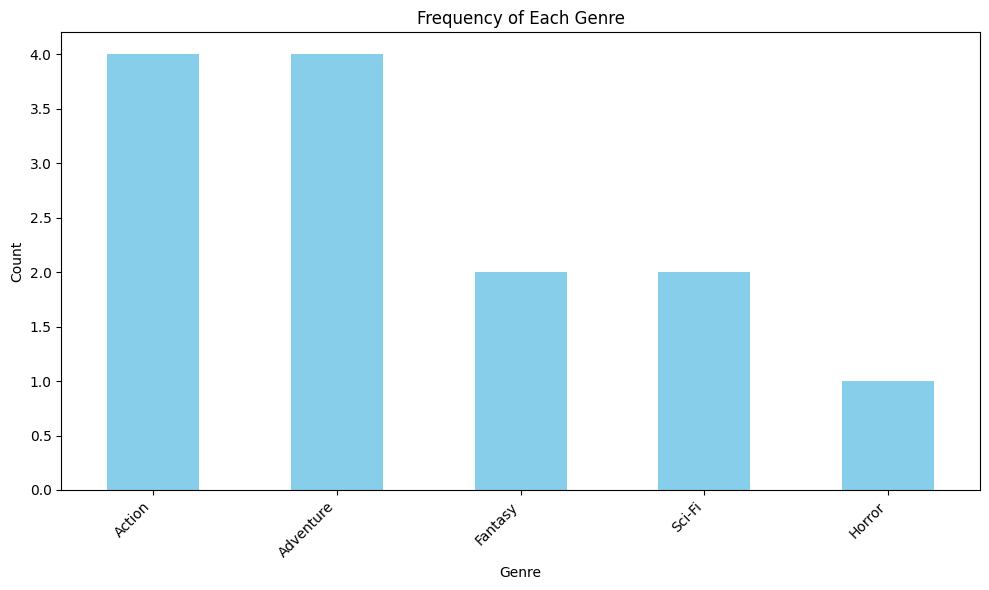

The most frequent genre is 'Action' with 4 occurrences.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'budget_release_date': ['2009-12-18', '2011-05-20', '2015-05-01', '2018-04-27', '2017-11-17'],
    'title': ['Avatar', 'Pirates of the Caribbean: On Stranger Tides', 'Avengers: Age of Ultron', 'Avengers: Infinity War', 'Justice League'],
    'budget': [425000000.0, 410600000.0, 330600000.0, 300000000.0, 300000000.0],
    'domestic_gross': [760507625.0, 241063875.0, 459005868.0, 678815482.0, 229024295.0],
    'worldwide_gross': [2.776345e+09, 1.045664e+09, 1.403014e+09, 2.048134e+09, 6.559452e+08],
    'average_rating': [6.1, 6.6, 7.3, 8.5, 6.5],
    'num_votes': [43.0, 447624.0, 665594.0, 670926.0, 329135.0],
    'runtime_minutes': [93.0, 136.0, 141.0, 149.0, 120.0],
    'genres': ['Horror', 'Action,Adventure,Fantasy', 'Action,Adventure,Sci-Fi', 'Action,Adventure,Sci-Fi', 'Action,Adventure,Fantasy'],
    'original_language': ['en', 'en', 'en', 'en', 'en'],
    'popularity': [26.526, 30.579, 44.383, 80.773, 34.953]
}

merged_df = pd.DataFrame(data)

# Split the 'genres' column and count each genre's frequency
genres_split = merged_df['genres'].str.split(',', expand=True).stack()
genre_counts = genres_split.value_counts()

# Identify the most frequent genre
most_frequent_genre = genre_counts.idxmax()
most_frequent_count = genre_counts.max()

# Plot the frequency of each genre
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"The most frequent genre is '{most_frequent_genre}' with {most_frequent_count} occurrences.")


# EDA(Exploritary data analysis)

## Univariate Analysis

## Bivariate Analysis

## multivariate Analysis

## Linear regression Model

# Conclusions

# Reccomendations